# Data Bootcamp Final Project: Musical Trends As Described By Spotify Classifications

#### Author: Srishti Sanya (srishtisan@nyu.edu)

## Data Report

A significant portion of the work for this report was made up of the creation of the dataset of all #1 Billboard songs and their respective spotify features. For the sake of brevity, the code used to create the resulting dataset, "full_features.xlsx", which can be found in this repository, is included in a separate .py file, "dataset.py," also included in thsi repository. 

The dataset itself is a combination of two major sources of information- the Spotify Web API and the series of Wikipedia articles titled "List of Billboard Hot 100 number-one singles of XXXX," where XXXX is a four-digit year between 1997and 2017.
Using the information on the Wikipedia article, I created an Excel file of the top song on the Billboard charts for every week between January 1997 and November 2017, which amounted to 1,090 weeks' worth of songs. 

I then created a Spotify playlist of all of these songs, which can be found [here](https://open.spotify.com/user/srishy/playlist/2LbVmnpJx7ES0yj1kSSyM1) as a recommended soundtrack for the rest of this report, or simply for your listening leisure. I primarily did this to take advantage of the [Exportify](https://github.com/watsonbox/exportify) tool created by Github user "watsonbox" that will convert any Spotify playlist to a CSV document containing each track's name, artist, track length, and the Spotify URI, which was key in creating my final dataset. The Spotify URI is a Unique Resource Identifier that acts as an identifier for each object in the Spotify. I was interested only in URIs that began with "spotify:track:" and then the ID base-62 string that is used for each track of interest.  

Merging my billboard timeline file with the Exportify result of my playlist yielded the "track_basics" Excel file that can be foud in this repository. This file simply contains the Issue Date of the Billboard chart, the Track Name, the Artist, the Track Length in milliseconds, and the Spotify URI for each track.  I merged the files on the track name, so there was a small amount of cleaning and manual matchingthat had to be done when a song title on the Billboard charts did not match the title of the track on Spotify. The merge() method gives no consideration to whether a song entry is a duplicate, and simply populates the rest of the row with the information for that track name. 



#### Tools Used:

* Spotify Web API
* Exportify

In [1]:
import spotipy


import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials

import pprint
import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt
from IPython.display import display, Image # Displays things nicely

# helper function to print info about dataframe

def df_info(df):
    print("Shape: ", df.shape)
    print("dtypes: ", df.dtypes.to_dict())
    print("index dtype: ", df.index.dtype)
    return pd.concat([df.head(3), df.tail(3)])

"""
Created on Tue Oct 31 14:38:48 2017

@author: srish
"""

SPOTIPY_CLIENT_ID='fed119b8942c4c6c8ea06b12ea20f582'
SPOTIPY_CLIENT_SECRET='ed2528d5bc574621bbe33a9977dfe23f'
SPOTIPY_REDIRECT_URI= 'http://localhost:8888/callback'

scope = 'user-library-read'
username = 'srishy'

client_credentials_manager = SpotifyClientCredentials(client_id = SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, client_id = SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri= SPOTIPY_REDIRECT_URI)




def identify(song_id):
    print(sp.track(song_id)['name'])
    song_results = sp.audio_features(song_id)
    pprint.pprint(song_results)


In [3]:
identify('spotify:track:1jYiIOC5d6soxkJP81fxq2')

I'm the One
[{'acousticness': 0.0533,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1jYiIOC5d6soxkJP81fxq2',
  'danceability': 0.599,
  'duration_ms': 288877,
  'energy': 0.667,
  'id': '1jYiIOC5d6soxkJP81fxq2',
  'instrumentalness': 0,
  'key': 7,
  'liveness': 0.134,
  'loudness': -4.267,
  'mode': 1,
  'speechiness': 0.0367,
  'tempo': 80.984,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/1jYiIOC5d6soxkJP81fxq2',
  'type': 'audio_features',
  'uri': 'spotify:track:1jYiIOC5d6soxkJP81fxq2',
  'valence': 0.817}]


In [4]:
tracks = pd.read_excel("full_features.xlsx", sheet_name = "Sheet1")
tracks.head()

,Issue Date,Track Name,Spotify URI,Artist Name,acousticness,danceability,Track Length (ms),energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1997-01-04,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
1,1997-01-11,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
2,1997-01-18,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
3,1997-01-25,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112
4,1997-02-01,Un-Break My Heart,spotify:track:5Ihd9HrPvOADyVoonH9ZjB,Toni Braxton,0.413,0.625,270333,0.426,0.0,2,0.116,-8.392,0,0.0271,110.018,4,0.112


In [6]:
tracks.set_index(pd.DatetimeIndex(tracks['Issue Date']), inplace = True)

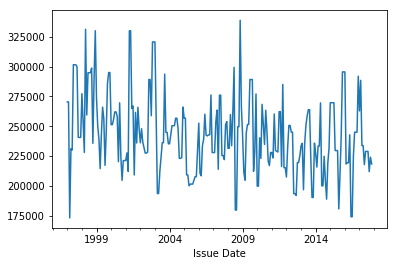

In [10]:
tracks["Track Length (ms)"].resample("M").median().plot()
plt.show()

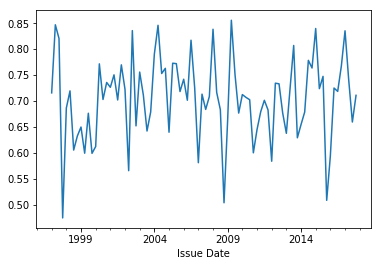

In [14]:
tracks.resample("Q").mean().danceability.plot()
plt.show()

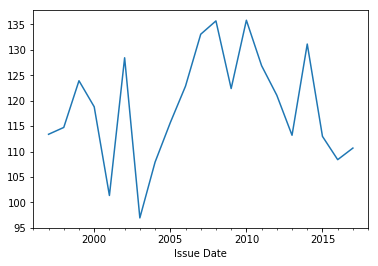

In [12]:
tracks.resample("Y").mean().tempo.plot()
plt.show()